## Algoritmo UMAP

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import umap

df = pd.read_csv('data/breast-cancer-wisconsin.csv')

## Preprocesamiento
- Se elimina 'id' porque es un identificador sin valor informativo.
- Se elimina 'diagnosis' porque es la variable objetivo (no la usamos para entrenar)
- Se elimina columna con valores nulos
- Le damos a UMAP solo las features numéricas (medidas del tumor) — sin decirle qué es maligno y qué es benigno
- Normalizamos datos

In [12]:
X = df.drop(columns=['id', 'diagnosis'])
y = df['diagnosis']

# Eliminar columna vacía
X = X.dropna(axis=1, how='all')

print("Shape:", X.shape)
print("Nulos restantes:", X.isnull().sum().sum())

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

Shape: (569, 30)
Nulos restantes: 0


## Aplicar UMAP
Parámetros:
- n_components=2: proyección a 2D
- n_neighbors=15: vecinos por punto. Valor típico entre 5 y 50.
  Más bajo = más estructura local, más alto = más estructura global
- min_dist=0.1: distancia mínima entre puntos en la proyección.
  Más bajo = clústeres más compactos
- random_state=42: reproducibilidad

In [13]:
reducer = umap.UMAP(n_components=2, n_neighbors=15, min_dist=0.1, random_state=42)
X_umap = reducer.fit_transform(X_scaled)

umap_df = pd.DataFrame(X_umap, columns=['UMAP 1', 'UMAP 2'])
umap_df['Diagnóstico'] = y.values
umap_df['Diagnóstico_label'] = umap_df['Diagnóstico'].map({'M': 'Maligno', 'B': 'Benigno'})

print("Forma del resultado UMAP:", X_umap.shape)
umap_df.head()

c:\Users\irisa\AppData\Local\Programs\Python\Python311\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


Forma del resultado UMAP: (569, 2)


,UMAP 1,UMAP 2,Diagnóstico,Diagnóstico_label
0,3.137418,-9.278483,M,Maligno
1,2.774715,-6.930414,M,Maligno
2,3.195261,-8.565994,M,Maligno
3,5.641698,-7.778485,M,Maligno
4,2.130295,-7.386322,M,Maligno


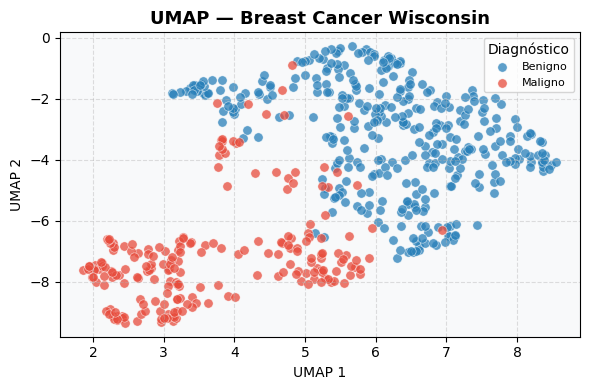

In [14]:
colores = {'Maligno': '#e74c3c', 'Benigno': '#2980b9'}

fig, ax = plt.subplots(figsize=(6, 4))

for tipo, grupo in umap_df.groupby('Diagnóstico_label'):
    ax.scatter(
        grupo['UMAP 1'], grupo['UMAP 2'],
        c=colores[tipo], label=tipo,
        alpha=0.75, s=45,
        edgecolors='white', linewidths=0.4
    )

ax.set_title('UMAP — Breast Cancer Wisconsin',
             fontsize=13, fontweight='bold')
ax.set_xlabel('UMAP 1', fontsize=10)
ax.set_ylabel('UMAP 2', fontsize=10)
ax.legend(title='Diagnóstico', fontsize=8)
ax.grid(True, linestyle='--', alpha=0.4)
ax.set_facecolor('#f8f9fa')
plt.tight_layout()
plt.show()

In [15]:
from IPython.display import display

resumen = umap_df.groupby('Diagnóstico_label')[['UMAP 1', 'UMAP 2']].agg(['mean', 'std']).round(3)
resumen.columns = ['UMAP1 Media', 'UMAP1 Std', 'UMAP2 Media', 'UMAP2 Std']

print("Estadísticas de proyecciones UMAP por clase")
display(resumen)

conteo = df['diagnosis'].value_counts().reset_index()
conteo.columns = ['Diagnóstico', 'Cantidad']
conteo['Porcentaje'] = (conteo['Cantidad'] / len(df) * 100).round(1)
conteo['Diagnóstico'] = conteo['Diagnóstico'].map({'M': 'Maligno', 'B': 'Benigno'})

print("Distribución del dataset")
display(conteo)

Estadísticas de proyecciones UMAP por clase


,UMAP1 Media,UMAP1 Std,UMAP2 Media,UMAP2 Std
Diagnóstico_label,,,,
Benigno,6.168,1.229,-3.226,1.740
Maligno,3.686,1.203,-7.146,1.666


Distribución del dataset


,Diagnóstico,Cantidad,Porcentaje
0,Benigno,357,62.7
1,Maligno,212,37.3
